In [249]:
# A bit of setup
import matplotlib.pyplot as plt
from google.colab import files
from urllib.request import urlopen
import random
import numpy as np
import sympy 
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.layers import LSTM,Dropout,Dense
import sklearn.metrics as sm
from keras.models import model_from_json
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import SimpleRNN,LSTM, Dense, Dropout, Masking, Embedding
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import preprocessing

In [250]:
sc = preprocessing.MinMaxScaler()

# Importing and Normilizing data




In [251]:
file_name = "ev_models.csv"
model_df = pd.read_csv(file_name, sep=",")
model_df = model_df.rename(columns={'Unnamed: 0': 'model_id', 'models': 'model'})
model_df.head()

,model_id,model,battery_size,charge_power,efficiency
0,0,Tesla Model S,72.5,16.5,0.175
1,1,Nissan Leaf e+,56.0,6.6,0.172
2,2,Renault Zoe,41.0,22.0,0.164
3,3,Volkswagen ID.3,45.0,7.2,0.161


In [252]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model_id      4 non-null      int64  
 1   model         4 non-null      object 
 2   battery_size  4 non-null      float64
 3   charge_power  4 non-null      float64
 4   efficiency    4 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 288.0+ bytes


In [253]:
model_df.describe()

,model_id,battery_size,charge_power,efficiency
count,4.000000,4.000000,4.000000,4.000000
mean,1.500000,53.625000,13.075000,0.168000
std,1.290994,14.091221,7.479472,0.006583
min,0.000000,41.000000,6.600000,0.161000
25%,0.750000,44.000000,7.050000,0.163250
50%,1.500000,50.500000,11.850000,0.168000
75%,2.250000,60.125000,17.875000,0.172750
max,3.000000,72.500000,22.000000,0.175000


In [254]:
file_name = "ev_home_locations.csv"
home_location_df = pd.read_csv(file_name, sep=",")
home_location_df = home_location_df.rename(columns={'Unnamed: 0': 'id'})
home_location_df.head()

,id,address,cadaster,latitude,longitude,x,y
0,0,"1, Kvissentali põik, Ülejõe, Tartu linn, Tartu...",79514:037:0033,58.406210,26.706300,6477173.28,658139.66
1,1,"28b/1, Orava, Raadi-Kruusamäe, Tartu linn, Tar...",79512:036:0020,58.389311,26.737114,6475347.92,660042.39
2,2,"16, Alevi, Karlova, Tartu linn, Tartu, Tartu l...",79508:016:0001,58.362547,26.726161,6472365.82,659521.12
3,3,"37, Voolu, Variku, Tartu linn, Tartu, Tartu li...",79509:019:0003,58.346618,26.702650,6470513.21,658227.79
4,4,"12, Ilmatsalu, Veeriku, Tartu linn, Tartu, Tar...",79502:006:0095,58.375785,26.690146,6473716.85,657353.49


In [255]:
home_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         100 non-null    int64  
 1   address    100 non-null    object 
 2   cadaster   100 non-null    object 
 3   latitude   100 non-null    float64
 4   longitude  100 non-null    float64
 5   x          100 non-null    float64
 6   y          100 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.6+ KB


In [256]:
home_location_df.describe()

,id,latitude,longitude,x,y
count,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,49.500000,58.369974,26.723026,6.473175e+06,659302.849700
std,29.011492,0.015366,0.028521,1.700388e+03,1677.847126
min,0.000000,58.343825,26.680755,6.470413e+06,656857.930000
25%,24.750000,58.358987,26.700887,6.472002e+06,658064.732500
50%,49.500000,58.370324,26.717327,6.473129e+06,658901.840000
75%,74.250000,58.380684,26.736425,6.474453e+06,660049.050000
max,99.000000,58.406210,26.792473,6.477173e+06,663411.450000


In [257]:
file_name = "ev_long_history.csv"
long_history_df = pd.read_csv(file_name, sep=",")
long_history_df = long_history_df.rename(columns={'Unnamed: 0': 'id'})
pd.set_option('display.max_rows', None)
#long_history_df[:500]

In [258]:
long_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         72000 non-null  int64  
 1   time       72000 non-null  int64  
 2   model      72000 non-null  object 
 3   connected  72000 non-null  bool   
 4   soc        72000 non-null  float64
 5   days       72000 non-null  int64  
 6   cadaster   72000 non-null  object 
 7   ev_id      72000 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 3.9+ MB


In [259]:
long_history_df.describe()

,id,time,soc,days,ev_id
count,72000.00000,72000.000000,72000.000000,72000.000000,72000.000000
mean,359.50000,12.500000,47.058425,15.500000,49.500000
std,207.84734,6.922235,15.953412,8.655502,28.866271
min,0.00000,1.000000,0.000000,1.000000,0.000000
25%,179.75000,6.750000,39.402184,8.000000,24.750000
50%,359.50000,12.500000,45.000000,15.500000,49.500000
75%,539.25000,18.250000,56.000000,23.000000,74.250000
max,719.00000,24.000000,72.500000,30.000000,99.000000


In [260]:
file_name = "public_chargers_locations.csv"
public_charger_location_df = pd.read_csv(file_name, sep=",")
public_charger_location_df = public_charger_location_df.rename(columns={'Unnamed: 0': 'id'})
public_charger_location_df.head()

,id,address,cadaster,latitude,longitude,x,y
0,0,"78, Tiigi, Kesklinn, Tartu linn, Tartu, Tartu ...",79506:006:0001,58.373603,26.710675,6473552.48,658596.39
1,1,"30, Veski, Kesklinn, Tartu linn, Tartu, Tartu ...",79507:021:0003,58.378190,26.711309,6474073.17,658582.03
2,2,"Heino Elleri nimeline Tartu Muusikakool, 15, L...",79507:019:0002,58.380050,26.717865,6474277.29,658997.44
3,3,"20A, Sepa, Ropka tööstusrajoon, Tartu linn, Ta...",79511:002:0027,58.350656,26.729897,6471029.11,659793.82
4,4,"7, Tamme põik, Tammelinn, Tartu linn, Tartu, T...",79504:053:0019,58.357376,26.695822,6471706.87,657778.20


In [261]:
public_charger_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         50 non-null     int64  
 1   address    50 non-null     object 
 2   cadaster   50 non-null     object 
 3   latitude   50 non-null     float64
 4   longitude  50 non-null     float64
 5   x          50 non-null     float64
 6   y          50 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [262]:
public_charger_location_df.describe()

,id,latitude,longitude,x,y
count,50.00000,50.000000,50.000000,5.000000e+01,50.000000
mean,24.50000,58.369952,26.720251,6.473165e+06,659140.048000
std,14.57738,0.014597,0.028202,1.633935e+03,1639.595133
min,0.00000,58.339484,26.677914,6.469794e+06,656703.310000
25%,12.25000,58.358984,26.697587,6.471941e+06,657877.192500
50%,24.50000,58.372706,26.717046,6.473473e+06,658936.005000
75%,36.75000,58.382243,26.737459,6.474546e+06,660109.225000
max,49.00000,58.398084,26.789107,6.476292e+06,663265.300000


In [263]:
home_location_df["location_type"] = "home"
public_charger_location_df["location_type"] = "public"

location_df = pd.concat([home_location_df, public_charger_location_df])
location_df = location_df.rename(columns={'id': 'loc_id'})
location_df.head()

,loc_id,address,cadaster,latitude,longitude,x,y,location_type
0,0,"1, Kvissentali põik, Ülejõe, Tartu linn, Tartu...",79514:037:0033,58.406210,26.706300,6477173.28,658139.66,home
1,1,"28b/1, Orava, Raadi-Kruusamäe, Tartu linn, Tar...",79512:036:0020,58.389311,26.737114,6475347.92,660042.39,home
2,2,"16, Alevi, Karlova, Tartu linn, Tartu, Tartu l...",79508:016:0001,58.362547,26.726161,6472365.82,659521.12,home
3,3,"37, Voolu, Variku, Tartu linn, Tartu, Tartu li...",79509:019:0003,58.346618,26.702650,6470513.21,658227.79,home
4,4,"12, Ilmatsalu, Veeriku, Tartu linn, Tartu, Tar...",79502:006:0095,58.375785,26.690146,6473716.85,657353.49,home


In [264]:
work_df = pd.merge(left=long_history_df, right=model_df, how='left', left_on="model", right_on="model")

work_df = pd.merge(left=work_df, right=location_df, how='left', left_on='cadaster', right_on='cadaster')

In [265]:
work_df.head(10)

,id,time,model,connected,soc,days,cadaster,ev_id,model_id,battery_size,charge_power,efficiency,loc_id,address,latitude,longitude,x,y,location_type
0,0,1,Nissan Leaf e+,True,36.250000,1,79514:037:0033,0,1,56.0,6.6,0.172,0,"1, Kvissentali põik, Ülejõe, Tartu linn, Tartu...",58.406210,26.706300,6477173.28,658139.66,home
1,1,2,Nissan Leaf e+,True,42.850000,1,79514:037:0033,0,1,56.0,6.6,0.172,0,"1, Kvissentali põik, Ülejõe, Tartu linn, Tartu...",58.406210,26.706300,6477173.28,658139.66,home
2,2,3,Nissan Leaf e+,True,49.450000,1,79514:037:0033,0,1,56.0,6.6,0.172,0,"1, Kvissentali põik, Ülejõe, Tartu linn, Tartu...",58.406210,26.706300,6477173.28,658139.66,home
3,3,4,Nissan Leaf e+,True,56.000000,1,79514:037:0033,0,1,56.0,6.6,0.172,0,"1, Kvissentali põik, Ülejõe, Tartu linn, Tartu...",58.406210,26.706300,6477173.28,658139.66,home
4,4,5,Nissan Leaf e+,True,56.000000,1,79514:037:0033,0,1,56.0,6.6,0.172,0,"1, Kvissentali põik, Ülejõe, Tartu linn, Tartu...",58.406210,26.706300,6477173.28,658139.66,home
5,5,6,Nissan Leaf e+,False,56.000000,1,79514:037:0033,0,1,56.0,6.6,0.172,0,"1, Kvissentali põik, Ülejõe, Tartu linn, Tartu...",58.406210,26.706300,6477173.28,658139.66,home
6,6,7,Nissan Leaf e+,True,47.480729,1,79507:007:0005,0,1,56.0,6.6,0.172,22,"Hugo Treffneri Gümnaasium, 12, Munga, Kesklinn...",58.382241,26.720496,6474543.89,659056.19,public
7,7,8,Nissan Leaf e+,False,54.080729,1,79507:007:0005,0,1,56.0,6.6,0.172,22,"Hugo Treffneri Gümnaasium, 12, Munga, Kesklinn...",58.382241,26.720496,6474543.89,659056.19,public
8,8,9,Nissan Leaf e+,False,49.061419,1,79507:007:0005,0,1,56.0,6.6,0.172,22,"Hugo Treffneri Gümnaasium, 12, Munga, Kesklinn...",58.382241,26.720496,6474543.89,659056.19,public
9,9,10,Nissan Leaf e+,False,48.201419,1,79507:007:0005,0,1,56.0,6.6,0.172,22,"Hugo Treffneri Gümnaasium, 12, Munga, Kesklinn...",58.382241,26.720496,6474543.89,659056.19,public


In [266]:
clean_work_df["soc_diff_charged"] = np.where(clean_work_df["soc"].diff() > 0, clean_work_df["soc"].diff(), 0)
clean_work_df["soc_diff_used"] = np.where(clean_work_df["soc"].diff() < 0, clean_work_df["soc"].diff(), 0)

#set days 1 = 0, because we don't want to calculate from different model
clean_work_df[(clean_work_df["days"] == 1) & (clean_work_df["time"] == 1)]["soc_diff_charged"] = 0
clean_work_df[(clean_work_df["days"] == 1) & (clean_work_df["time"] == 1)]["soc_diff_used"] = 0

clean_work_df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ev_id,model_id,days,time,connected,soc,loc_id,location_type,location_val,soc_diff_charged,soc_diff_used
0,0,1,1,1,True,36.250000,0,home,0,0.00,0.000000
1,0,1,1,2,True,42.850000,0,home,0,6.60,0.000000
2,0,1,1,3,True,49.450000,0,home,0,6.60,0.000000
3,0,1,1,4,True,56.000000,0,home,0,6.55,0.000000
4,0,1,1,5,True,56.000000,0,home,0,0.00,0.000000
5,0,1,1,6,False,56.000000,0,home,0,0.00,0.000000
6,0,1,1,7,True,47.480729,22,public,1,0.00,-8.519271
7,0,1,1,8,False,54.080729,22,public,1,6.60,0.000000
8,0,1,1,9,False,49.061419,22,public,1,0.00,-5.019311
9,0,1,1,10,False,48.201419,22,public,1,0.00,-0.860000


In [267]:
charge_summary_df = clean_work_df[clean_work_df["connected"] == True].groupby(["ev_id", "model_id", "days"])["connected"].agg(["count"])
charge_summary_df = charge_summary_df.reset_index(level=[0,1,2])

#get drive times
tmp = clean_work_df[clean_work_df["connected"] == False].groupby(["ev_id", "model_id", "days"])["connected"].agg(["count"])
tmp = tmp.reset_index(level=[0,1,2])
charge_summary_df = charge_summary_df.rename(columns={'count': 'charged_times'})
charge_summary_df["drive_times"] = tmp['count']

#get charged and used power
tmp = clean_work_df.groupby(["ev_id", "model_id", "days"])[["soc_diff_charged", "soc_diff_used"]].agg(["sum"])
tmp = tmp.reset_index(level=[0,1,2])
charge_summary_df["total_charged"] = tmp["soc_diff_charged"]["sum"]
charge_summary_df["total_used"] = tmp["soc_diff_used"]["sum"]

charge_summary_df.head(10)


,ev_id,model_id,days,charged_times,drive_times,total_charged,total_used
0,0,1,1,13,11,72.550000,-67.618828
1,0,1,2,11,13,68.410241,-78.961995
2,0,1,3,15,9,72.698554,-53.539766
3,0,1,4,16,8,38.877431,-32.665637
4,0,1,5,16,8,22.934849,-24.577437
5,0,1,6,18,6,16.562588,-26.115371
6,0,1,7,15,9,48.538978,-37.343607
7,0,1,8,13,11,26.542054,-46.913451
8,0,1,9,13,11,76.835849,-86.174526
9,0,1,10,17,7,53.733208,-24.023134


In [268]:
pd.set_option('display.max_rows', None)
merged_inner = pd.merge(left=clean_work_df, right=model_df, left_on='model_id', right_on='model_id')
merged_inner["soc_diff"] = abs(merged_inner["soc_diff_charged"] +  merged_inner["soc_diff_used"])
merged_inner["distance_traveled"] = abs(merged_inner["soc_diff_used"]) / merged_inner["efficiency"]
merged_inner["connected_val"] = np.where(merged_inner["connected"], 1, 0) 
merged_inner["location_val"] = np.where(merged_inner["location_type"] == "home", 0, 1)
tmp_df = merged_inner[merged_inner["ev_id"] == 0]
 
train_work_df = tmp_df[: int(np.round(len(tmp_df) * 0.8))]
val_work_df = tmp_df[int(np.round(len(tmp_df) * 0.8)) :]
 
for i in range(1, 100):
  tmp_df = merged_inner[merged_inner["ev_id"] == i]
 
  train_work_df = pd.concat([train_work_df, tmp_df[: int(np.round(len(tmp_df) * 0.8))]])
  val_work_df = pd.concat([val_work_df, tmp_df[int(np.round(len(tmp_df) * 0.8)) :]])
 
print(train_work_df.shape)
print(val_work_df.shape)

(57600, 18)
(14400, 18)


# Distnce RNN

## Creating the model

In [269]:
def getModelNN2(X, y):
  X['distance_traveled'] = y
  X = sc.fit_transform(X)

  x_training_data = []
 
  y_training_data =[]

  for i in range(100, len(X)):
    x_training_data.append(X[i-100:i, 0])

    y_training_data.append(X[i, 0])
 
  x_training_data = np.array(x_training_data)
  
  y_training_data = np.array(y_training_data)
  
  x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], 
  
                                                x_training_data.shape[1], 
  
                                                1))

  model = Sequential()
  model.add(LSTM(units = 45, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(units = 1))
  
  model.compile(loss='mean_squared_error', optimizer='adam')
  history = model.fit(x_training_data, y_training_data, epochs = 10, batch_size = 32,validation_split = 0.2)
  return model, history

##Plotting and Predicting

In [233]:
def dataForNN(data):
    merged_inner = pd.merge(left=clean_work_df, right=model_df, left_on='model_id', right_on='model_id')
    merged_inner["soc_diff"] = abs(merged_inner["soc_diff_charged"] +  merged_inner["soc_diff_used"])
    merged_inner["distance_traveled"] = merged_inner["soc_diff_used"] / merged_inner["efficiency"]

    X = merged_inner[["ev_id", "time", "days"]]
    y = merged_inner["distance_traveled"]

    # Normalizing data.
    X = pd.concat([X, pd.get_dummies(X["ev_id"], prefix = "ev_id")], axis=1, sort=False)
    del X["ev_id"]
    X = pd.concat([X, pd.get_dummies(X["time"], prefix = "time")], axis=1, sort=False)
    del X["time"]
    X = pd.concat([X, pd.get_dummies(X["days"], prefix = "days")], axis=1, sort=False)
    del X["days"]

    return X, y

from keras.models import Sequential
from keras.layers import Dense, Dropout

def getModelNN(X, y):
  model = Sequential()
  model.add(Dense(64, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(1))
  model.compile(loss='mean_absolute_error', optimizer='adam')
  history = model.fit(X, y, epochs=40, batch_size=200, validation_split = 0.2)
  return model, history
from matplotlib import pyplot as plt

# From HW4.
def plot_curves(history):
    plt.figure(figsize=(16, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss')

X_nn, y_nn = dataForNN(clean_work_df)
model_nn, history_nn = getModelNN2(X_nn, y_nn)
#plot_curves(history_nn)

def getModifiedInput(day, ev_id, max_days, max_ev_id):
    frames = []

    max_days += 1
    max_hours = 24 + 1
    max_ev_id += 1

    for h in range(24):
      # days columns
      day_col = ["days_" + str(d) for d in range(1, max_days)]
      day_row = [0 for _ in range(1, max_days)]
      day_row[day] = 1

      # hour columns
      hour_col = ["time_" + str(t) for t in range(1, max_hours)]
      hour_row = [0 for _ in range(1, max_hours)]
      hour_row[h] = 1

      # ev_id columns
      ev_col = ["ev_id_" + str(e) for e in range(int(max_ev_id))]
      ev_row = [0 for _ in range(max_ev_id)]
      ev_row[ev_id] = 1

      df = pd.DataFrame([day_row + hour_row + ev_row], columns = (day_col + hour_col + ev_col))
      frames.append(df)
    return pd.concat(frames)


def getMaxDays(data):
    return data["ev_id"].max()


def getMaxEvId(data):
    return data["days"].max()


def predict24h(model, ev_id, max_days, max_ev_id):
    nn_df_24h = getModifiedInput(1, ev_id, int(max_days), int(max_ev_id))
    print(nn_df_24h)
    sm = nn_df_24h.values
    smashing = np.reshape(sm, (-1,1))
    smashing = sc.fit_transform(smashing)
    final_x_test_data = []
    
    for i in range(24, len(smashing)):

      final_x_test_data.append(smashing[i-24:i, 0])

    final_x_test_data = np.array(final_x_test_data)

    final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], 

                                                  final_x_test_data.shape[1], 

                                                  1))
    predicted = model.predict(final_x_test_data)
    predicted[predicted < 0] = 0
    return predicted

def returnPredictData(ev_id, time, ds):
  #example time = 15
  data = []
  counter = time
  for i in range(24):
    if(counter == 24):
      counter = 1
    helper = ds[(ds["ev_id"] == ev_id) & (ds["days"] == 24) & (ds["time"] == counter)]["distance_traveled"].values[0]
    data.append([ev_id, counter, helper])
    counter+=1
  return pd.DataFrame(data, columns = ['ev_id', 'time' ,'distance_traveled'])

Epoch 1/10
1798/1798 [==============================] - 14s 8ms/step - loss: 0.0013 - val_loss: 9.7454e-07
Epoch 2/10
1798/1798 [==============================] - 14s 8ms/step - loss: 0.0011 - val_loss: 7.0674e-06
Epoch 3/10
1798/1798 [==============================] - 14s 8ms/step - loss: 0.0011 - val_loss: 1.3048e-08
Epoch 4/10
1798/1798 [==============================] - 14s 8ms/step - loss: 0.0010 - val_loss: 7.1737e-08
Epoch 5/10
1798/1798 [==============================] - 14s 8ms/step - loss: 0.0011 - val_loss: 7.2726e-07
Epoch 6/10
1798/1798 [==============================] - 14s 8ms/step - loss: 0.0011 - val_loss: 6.4554e-06
Epoch 7/10
1798/1798 [==============================] - 14s 8ms/step - loss: 0.0010 - val_loss: 6.2311e-07
Epoch 8/10
1798/1798 [==============================] - 14s 8ms/step - loss: 0.0010 - val_loss: 1.0297e-05
Epoch 9/10
1798/1798 [==============================] - 14s 8ms/step - loss: 0.0010 - val_loss: 5.6658e-08
Epoch 10/10
1798/1798 [==============

##Creating the test set

In [234]:
test_data = returnPredictData(5, 8, train_work_df)

test_data = test_data.iloc[:, 1].values

unscaled_training_data = train_work_df[['time', 'distance_traveled', 'ev_id']]
unscaled_test_data = returnPredictData(5, 8, train_work_df)

all_data = pd.concat((unscaled_training_data['distance_traveled'], unscaled_test_data['distance_traveled']), axis = 0)


x_test_data = all_data[len(all_data) - len(test_data) - 40:].values

x_test_data = np.reshape(x_test_data, (-1, 1))

x_test_data = sc.fit_transform(x_test_data)

final_x_test_data = []
 
for i in range(40, len(x_test_data)):
 
    final_x_test_data.append(x_test_data[i-1:i, 0])
 
final_x_test_data = np.array(final_x_test_data)

final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], 
 
                                               final_x_test_data.shape[1], 
 
                                               1))
predictions = model_nn.predict(final_x_test_data)

##Plotting validation vs. predicted

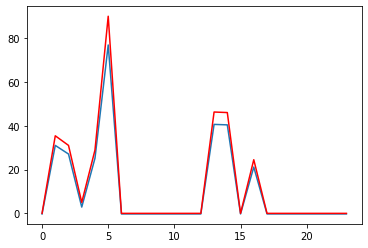

In [235]:
nsamples, nx, ny = predictions.shape
d2 = predictions.reshape((nsamples,nx*ny))
unscaled_predictions = sc.inverse_transform(d2)

nsamples, nx, ny = final_x_test_data.shape
fd2 = final_x_test_data.reshape((nsamples, nx*ny))
f_unscaled_predictions = sc.inverse_transform(fd2)

plt.clf() #This clears the first prediction plot from our canvas
 
plt.plot(unscaled_predictions[:100])
plt.plot(f_unscaled_predictions[:100], color='red')
 
plt.show()

#Grid Connection Model

##Dataset additions

In [236]:
driving_behavior = []
driving_behavior.append(0)
helper = work_df[['soc']].values
for x in range(1, len(helper)):
  if(helper[x] < helper[x-1]):
    driving_behavior.append(1)
  else:
    driving_behavior.append(0)

work_df[['Driving']] = np.where(work_df["connected"], 0, 1) 

In [237]:
work_df[['soc', 'Driving', "connected"]].head(10)

,soc,Driving,connected
0,36.250000,0,True
1,42.850000,0,True
2,49.450000,0,True
3,56.000000,0,True
4,56.000000,0,True
5,56.000000,1,False
6,47.480729,0,True
7,54.080729,1,False
8,49.061419,1,False
9,48.201419,1,False


##XGBoost implementation on it's own

In [238]:
train_work_df[['driving']] = np.where(train_work_df["connected"], 0, 1) 
X = train_work_df[['ev_id', 'time', 'soc', 'distance_traveled']]
y = []
for elem in train_work_df[["driving"]].values:
  y.append(elem[0])

X_test = val_work_df[['ev_id', 'time', 'soc', 'distance_traveled']]
Y_test = np.where(val_work_df["connected"], 0, 1)

In [239]:
dtrain = xgb.DMatrix(X,label = y)
dtest = xgb.DMatrix(X_test, label=Y_test)

In [240]:
param_list = {'max_depth': 6, 'eta': 1, 'objective': 'binary:hinge'}
param_list['nthread'] = 4
param_list['eval_metric'] = 'auc'

In [241]:
n_rounds = 600

# if nothing seems to improve for 50 iterations - stop
early_stopping = 50

# train for training and test for ... validation!    
eval_list = [(dtrain, 'Train'), (dtest, 'Validation')]

# 1,2,3.. go!
bst = xgb.train(param_list, dtrain, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping, verbose_eval=True)

[0]	Train-auc:0.604249	Validation-auc:0.601841
Multiple eval metrics have been passed: 'Validation-auc' will be used for early stopping.

Will train until Validation-auc hasn't improved in 50 rounds.
[1]	Train-auc:0.657669	Validation-auc:0.653658
[2]	Train-auc:0.656548	Validation-auc:0.653014
[3]	Train-auc:0.651009	Validation-auc:0.642484
[4]	Train-auc:0.644179	Validation-auc:0.635658
[5]	Train-auc:0.645108	Validation-auc:0.636427
[6]	Train-auc:0.643658	Validation-auc:0.635523
[7]	Train-auc:0.645136	Validation-auc:0.637017
[8]	Train-auc:0.645751	Validation-auc:0.637267
[9]	Train-auc:0.645785	Validation-auc:0.63767
[10]	Train-auc:0.647894	Validation-auc:0.638582
[11]	Train-auc:0.64759	Validation-auc:0.638582
[12]	Train-auc:0.648091	Validation-auc:0.637723
[13]	Train-auc:0.651489	Validation-auc:0.640585
[14]	Train-auc:0.651273	Validation-auc:0.639789
[15]	Train-auc:0.653914	Validation-auc:0.641023
[16]	Train-auc:0.657221	Validation-auc:0.64351
[17]	Train-auc:0.657848	Validation-auc:0.643

##Feature importance in XGBoost

0.6931035133501782

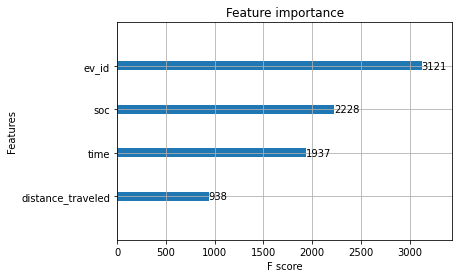

In [242]:
from sklearn.metrics import precision_score
ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
xgb.plot_importance(bst)
precision_score(Y_test, ypred, average='macro')

In [243]:
mat = xgb.DMatrix(X ,label = y)

##XGClassifier for VotingClassifier

In [244]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X, y)
y_val_pred = xgb.predict_proba(X_test)
xgb.score(X_test, Y_test)

0.6909027777777778

##RandomForestClassifier

In [245]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=4,
                          n_informative=4, n_redundant=0,
                          random_state=0, shuffle=True)

clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X, y)
prediction = clf.predict(X_test)
print(accuracy_score(prediction, Y_test))


pred_positive = sum(sum([prediction == Y_test]))
print(f'Actual classes of points predicted positive: {pred_positive}')

pred_negative = sum(sum([prediction != Y_test]))
print(f'Actual classes of points predicted negative: {pred_negative}')

0.3520138888888889
Actual classes of points predicted positive: 5069
Actual classes of points predicted negative: 9331


##Plotting RandomForestClassifier results

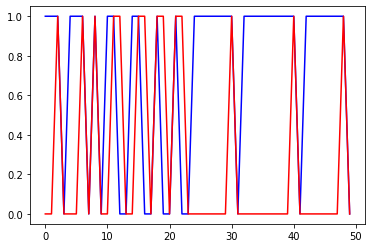

In [246]:
plt.plot(prediction[:50], color='blue')
plt.plot(Y_test[:50], color='red')
plt.show()

##GaussianNB model

In [247]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification

X = train_work_df[['ev_id', 'time', 'soc', 'distance_traveled']]
y = []
for elem in train_work_df[["driving"]].values:
  y.append(elem[0])
X_test = val_work_df[['ev_id', 'time', 'soc', 'distance_traveled']]
Y_test = np.where(val_work_df["connected"], 0, 1)
gnb = GaussianNB()
gnb.fit(X, y)
gnb.predict(X_test)
gnb.score(X_test, Y_test)

0.6477777777777778

##VotingClassifier

In [248]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('rf', clf), ('gaussian', gnb), ('xgb', xgb)], voting='hard', weights=[1,1,2])
eclf1 = eclf1.fit(X, y)
print(eclf1.predict(X_test))
eclf1.score(X_test, Y_test)

[0 0 0 ... 0 0 0]


0.6899305555555556